# Assignment-3


In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


## Exercise-1


In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
tf.random.set_seed(42)

In [21]:
def plot_history(history):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    axs[0].plot(history.history['accuracy'], label='accuracy')
    axs[0].plot(history.history['val_accuracy'], label='val_accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_ylim([0.1, 1])
    axs[0].legend(loc='lower right')

    axs[1].plot(history.history['loss'], label='loss')
    axs[1].plot(history.history['val_loss'], label='val_loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_ylabel('Loss')
    axs[1].legend(loc='upper right')

    axs[2].text(0.1, 0.5, f'Final Train Acc: {history.history["accuracy"][-1]:.4f}\nFinal Val Acc: {history.history["val_accuracy"][-1]:.4f}', fontsize=12)
    axs[2].axis('off')

    plt.show()

In [22]:
def eval_model(model, x_test, y_test):
    y_prob = model.predict(x_test, batch_size=128, verbose=0)
    y_pred = np.argmax(y_prob, axis=1)

    print(classification_report(y_test, y_pred, digits=4))

    cm = confusion_matrix(y_test, y_pred)
    print(cm)

In [23]:
seqential_model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
        tf.keras.layers.Dense(64, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      restore_best_weights=True)

seqential_model_1.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)

x_train_1, y_train_1 = x_train[:1000], y_train[:1000]
x_test_1 , y_test_1 = x_test[:200], y_test[:200]

x_tr_1, x_val_1, y_tr_1, y_val_1 = train_test_split(
    x_train_1, y_train_1, test_size=0.2, random_state=42, stratify=y_train_1
)

history_1 = seqential_model_1.fit(x_tr_1, y_tr_1,
                              epochs=50,
                              batch_size = 32,
                              validation_data=(x_val_1, y_val_1),
                              callbacks=[early_stop],
                              verbose=2,)


Epoch 1/50


/Users/joachim/miniconda3/envs/tfmac/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 - 1s - 58ms/step - accuracy: 0.5000 - loss: 1.6330 - val_accuracy: 0.7400 - val_loss: 0.9788
Epoch 2/50
25/25 - 0s - 13ms/step - accuracy: 0.8388 - loss: 0.6525 - val_accuracy: 0.8350 - val_loss: 0.6023
Epoch 3/50
25/25 - 0s - 13ms/step - accuracy: 0.9038 - loss: 0.3718 - val_accuracy: 0.8550 - val_loss: 0.4993
Epoch 4/50
25/25 - 0s - 13ms/step - accuracy: 0.9450 - loss: 0.2525 - val_accuracy: 0.8600 - val_loss: 0.4580
Epoch 5/50
25/25 - 0s - 13ms/step - accuracy: 0.9600 - loss: 0.1802 - val_accuracy: 0.8650 - val_loss: 0.4455
Epoch 6/50
25/25 - 0s - 13ms/step - accuracy: 0.9762 - loss: 0.1296 - val_accuracy: 0.8700 - val_loss: 0.4463
Epoch 7/50
25/25 - 0s - 13ms/step - accuracy: 0.9837 - loss: 0.0920 - val_accuracy: 0.8700 - val_loss: 0.4461
Epoch 8/50
25/25 - 0s - 13ms/step - accuracy: 0.9925 - loss: 0.0640 - val_accuracy: 0.8850 - val_loss: 0.4442
Epoch 9/50
25/25 - 0s - 13ms/step - accuracy: 0.9987 - loss: 0.0451 - val_accuracy: 0.8950 - val_loss: 0.4485
Epoch 10/50
25/25 - 0

### Q1.1

At the end of training the model ended up with a validation accuracy on 86% and when evaluated on test set it ended up with 91% accuracy

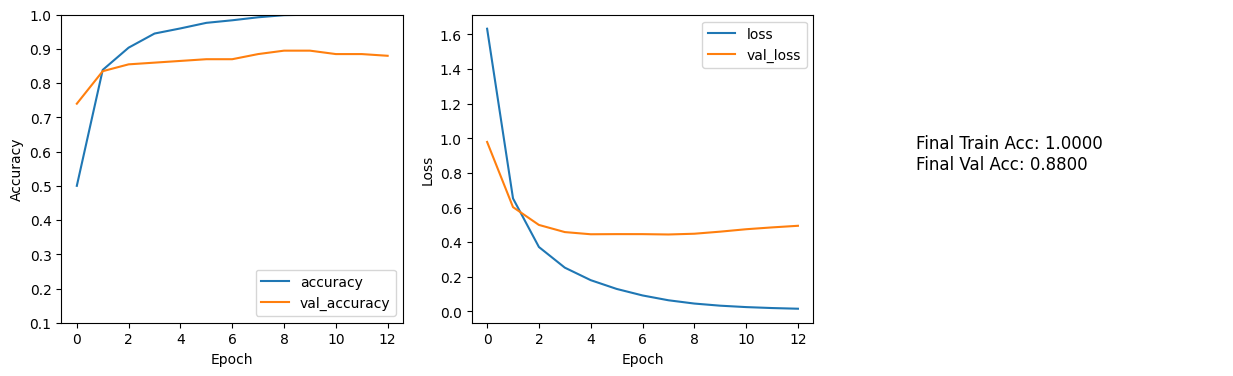

In [24]:
plot_history(history_1)

In [25]:
eval_model(seqential_model_1, x_test_1, y_test_1)

              precision    recall  f1-score   support

           0     1.0000    0.9412    0.9697        17
           1     1.0000    1.0000    1.0000        28
           2     0.6818    0.9375    0.7895        16
           3     0.8462    0.6875    0.7586        16
           4     0.9259    0.8929    0.9091        28
           5     0.9500    0.9500    0.9500        20
           6     0.9474    0.9000    0.9231        20
           7     0.9565    0.9167    0.9362        24
           8     0.9091    1.0000    0.9524        10
           9     0.8571    0.8571    0.8571        21

    accuracy                         0.9100       200
   macro avg     0.9074    0.9083    0.9046       200
weighted avg     0.9168    0.9100    0.9108       200

[[16  0  0  1  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 15  0  1  0  0  0  0  0]
 [ 0  0  4 11  0  1  0  0  0  0]
 [ 0  0  0  0 25  0  1  0  0  2]
 [ 0  0  0  0  0 19  0  0  1  0]
 [ 0  0  2  0  0  0 18  0  0  0]
 [ 0  0  0

## Exercise-2

In [26]:
cifar = tf.keras.datasets.cifar10
(cifar_x_train, cifar_y_train), (cifar_x_test, cifar_y_test) = cifar.load_data()


In [27]:
seqential_model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(256, tf.keras.activations.elu, kernel_initializer="he_normal"),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      restore_best_weights=True)

seqential_model_2.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)

x_train_2, y_train_2 = cifar_x_train[:5000].astype("float32")/255.0, cifar_y_train[:5000].ravel()
x_test_2,  y_test_2  = cifar_x_test[:1000].astype("float32")/255.0,  cifar_y_test[:1000].ravel()

x_tr_2, x_val_2, y_tr_2, y_val_2 = train_test_split(
    x_train_2, y_train_2, test_size=0.2, random_state=42, stratify=y_train_2
)

history_2 = seqential_model_2.fit(x_tr_2, y_tr_2,
                              epochs=50,
                              batch_size = 128,
                              validation_data=(x_val_2, y_val_2),
                              callbacks=[early_stop],
                              verbose=2,)


Epoch 1/50


/Users/joachim/miniconda3/envs/tfmac/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


32/32 - 2s - 53ms/step - accuracy: 0.1558 - loss: 3.0668 - val_accuracy: 0.1080 - val_loss: 2.4256
Epoch 2/50
32/32 - 1s - 18ms/step - accuracy: 0.2752 - loss: 1.9968 - val_accuracy: 0.2270 - val_loss: 2.0973
Epoch 3/50
32/32 - 1s - 17ms/step - accuracy: 0.3217 - loss: 1.8737 - val_accuracy: 0.2520 - val_loss: 2.1493
Epoch 4/50
32/32 - 1s - 17ms/step - accuracy: 0.3470 - loss: 1.8042 - val_accuracy: 0.2630 - val_loss: 2.1126
Epoch 5/50
32/32 - 1s - 17ms/step - accuracy: 0.3767 - loss: 1.7378 - val_accuracy: 0.3080 - val_loss: 1.9765
Epoch 6/50
32/32 - 1s - 17ms/step - accuracy: 0.3983 - loss: 1.6742 - val_accuracy: 0.3190 - val_loss: 1.9051
Epoch 7/50
32/32 - 1s - 17ms/step - accuracy: 0.4123 - loss: 1.6179 - val_accuracy: 0.3420 - val_loss: 1.8746
Epoch 8/50
32/32 - 1s - 17ms/step - accuracy: 0.4355 - loss: 1.5625 - val_accuracy: 0.3300 - val_loss: 1.8949
Epoch 9/50
32/32 - 1s - 17ms/step - accuracy: 0.4572 - loss: 1.5086 - val_accuracy: 0.3160 - val_loss: 1.9756
Epoch 10/50
32/32 - 1

### Q2.1

This model ended up with a validation accuracy on 37% on validation and a 33% accuracy on the test set.

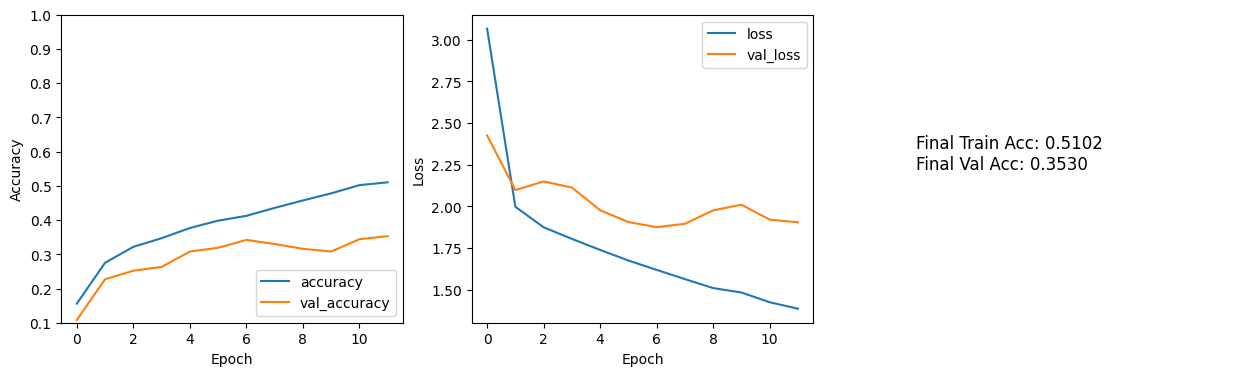

In [28]:
plot_history(history_2)

In [29]:
eval_model(seqential_model_2, x_test_2, y_test_2)

              precision    recall  f1-score   support

           0     0.3072    0.4951    0.3792       103
           1     0.4805    0.4157    0.4458        89
           2     0.1757    0.7100    0.2817       100
           3     0.5000    0.0874    0.1488       103
           4     0.2000    0.0333    0.0571        90
           5     0.3889    0.0814    0.1346        86
           6     0.5111    0.2054    0.2930       112
           7     0.5000    0.2157    0.3014       102
           8     0.4375    0.5283    0.4786       106
           9     0.5176    0.4037    0.4536       109

    accuracy                         0.3230      1000
   macro avg     0.4019    0.3176    0.2974      1000
weighted avg     0.4060    0.3230    0.3027      1000

[[51  1 26  0  0  0  4  2 15  4]
 [ 9 37 10  0  0  2  0  3 12 16]
 [19  1 71  0  0  0  2  2  5  0]
 [10  8 50  9  1  5  6  2  6  6]
 [11  5 58  1  3  0  4  3  3  2]
 [ 5  4 43  6  3  7  2  4 10  2]
 [ 2  3 74  0  2  2 23  3  1  2]
 [12  2 51

# Excercise-3

In [30]:
seqential_model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, tf.keras.activations.selu, tf.keras.initializers.lecun_normal()),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, tf.keras.activations.selu, tf.keras.initializers.lecun_normal()),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(64, tf.keras.activations.selu, tf.keras.initializers.lecun_normal()),
    tf.keras.layers.Dropout(rate=0.1),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                      patience=5,
                                      restore_best_weights=True)

seqential_model_3.compile(optimizer=tf.keras.optimizers.Nadam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)

x_train_3, y_train_3 = x_train[:1000], y_train[:1000]
x_test_3 , y_test_3 = x_test[:200], y_test[:200]

x_tr_3, x_val_3, y_tr_3, y_val_3 = train_test_split(
    x_train_3, y_train_3, test_size=0.2, random_state=42, stratify=y_train_3
)

history_3 = seqential_model_3.fit(x_tr_3, y_tr_3,
                              epochs=50,
                              batch_size = 32,
                              validation_data=(x_val_3, y_val_3),
                              callbacks=[early_stop],
                              verbose=2,)


Epoch 1/50


/Users/joachim/miniconda3/envs/tfmac/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 - 1s - 52ms/step - accuracy: 0.4250 - loss: 1.7434 - val_accuracy: 0.7300 - val_loss: 0.9577
Epoch 2/50
25/25 - 0s - 15ms/step - accuracy: 0.7725 - loss: 0.7911 - val_accuracy: 0.8050 - val_loss: 0.6297
Epoch 3/50
25/25 - 0s - 15ms/step - accuracy: 0.8438 - loss: 0.5261 - val_accuracy: 0.8300 - val_loss: 0.5559
Epoch 4/50
25/25 - 0s - 15ms/step - accuracy: 0.8800 - loss: 0.4200 - val_accuracy: 0.8500 - val_loss: 0.5057
Epoch 5/50
25/25 - 0s - 15ms/step - accuracy: 0.8888 - loss: 0.3599 - val_accuracy: 0.8550 - val_loss: 0.4833
Epoch 6/50
25/25 - 0s - 15ms/step - accuracy: 0.9087 - loss: 0.3053 - val_accuracy: 0.8550 - val_loss: 0.5029
Epoch 7/50
25/25 - 0s - 15ms/step - accuracy: 0.9212 - loss: 0.2312 - val_accuracy: 0.8600 - val_loss: 0.4883
Epoch 8/50
25/25 - 0s - 14ms/step - accuracy: 0.9300 - loss: 0.2206 - val_accuracy: 0.8700 - val_loss: 0.4965
Epoch 9/50
25/25 - 0s - 15ms/step - accuracy: 0.9575 - loss: 0.1703 - val_accuracy: 0.8450 - val_loss: 0.5327
Epoch 10/50
25/25 - 0

### Q3.1

With alpha dropout applied to training the model ended up with a 85% accuracy on the validation set and 92% accuracy on the test set.

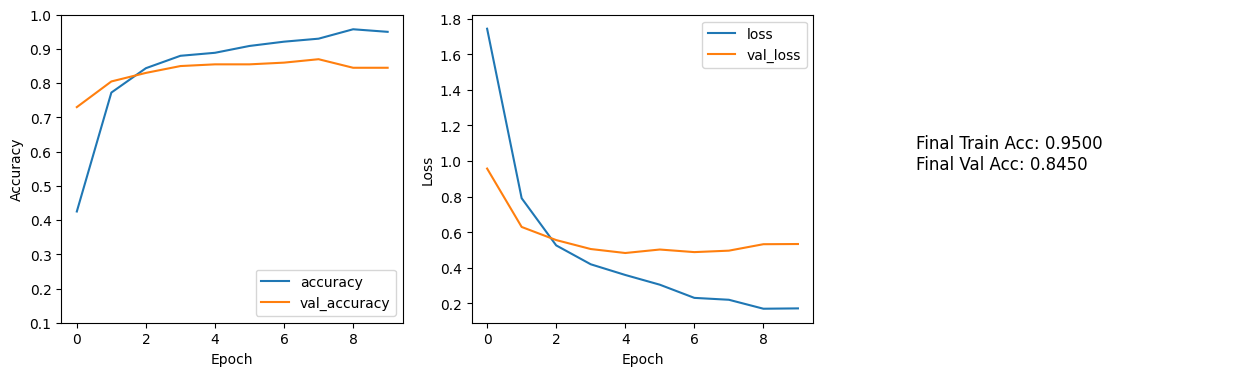

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        17
           1     1.0000    0.9643    0.9818        28
           2     0.7778    0.8750    0.8235        16
           3     1.0000    0.7500    0.8571        16
           4     0.8621    0.8929    0.8772        28
           5     0.8636    0.9500    0.9048        20
           6     0.9048    0.9500    0.9268        20
           7     0.8750    0.8750    0.8750        24
           8     1.0000    1.0000    1.0000        10
           9     0.8500    0.8095    0.8293        21

    accuracy                         0.9050       200
   macro avg     0.9133    0.9067    0.9076       200
weighted avg     0.9090    0.9050    0.9049       200

[[17  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  1  0  0  0  0]
 [ 0  0 14  0  1  0  0  1  0  0]
 [ 0  0  2 12  0  2  0  0  0  0]
 [ 0  0  0  0 25  0  1  0  0  2]
 [ 0  0  0  0  0 19  1  0  0  0]
 [ 0  0  1  0  0  0 19  0  0  0]
 [ 0  0  1

In [31]:
plot_history(history_3)
eval_model(seqential_model_3, x_test_3, y_test_3)


### Q3.2

With the MC-dropout the accuracy ended up on 92% accuracy

In [32]:
mc_passes = 20
probs = []
for _ in range(mc_passes):
    p = seqential_model_3(x_test_3, training=True).numpy() 
    probs.append(p)
probs_mean = np.mean(probs, axis=0)
y_pred = probs_mean.argmax(axis=1)
mc_acc = (y_pred == y_test_3).mean()
print(f" MC-Dropout test accuracy: {mc_acc:.4f}")

 MC-Dropout test accuracy: 0.8950


# Excerice-4

In [33]:
mobilenetv2_model = tf.keras.applications.MobileNetV2(
    include_top=False, weights="imagenet"
)

mobilenetv2_model.trainable = False

x_train_4, y_train_4 = cifar_x_train[:2000].astype("float32")/255.0, cifar_y_train[:2000].ravel()
x_test_4,  y_test_4  = cifar_x_test[:500].astype("float32")/255.0,  cifar_y_test[:500].ravel()

x_tr_4, x_val_4, y_tr_4, y_val_4 = train_test_split(
    x_train_4, y_train_4, test_size=0.2, random_state=42, stratify=y_train_4
)

seqential_model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Resizing(224, 224, interpolation="bilinear", antialias=True),
    tf.keras.layers.Rescaling(2.0, offset=-1.0), 
    mobilenetv2_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(128, tf.keras.activations.relu, kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, tf.keras.activations.softmax)
])


seqential_model_4.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'],)


history_4 = seqential_model_4.fit(x_tr_4, y_tr_4,
                              epochs=5,
                              batch_size = 32,
                              validation_data=(x_val_4, y_val_4),
                              verbose=2,)

/var/folders/wb/vdxbcw4j5sd6ncmy_df497_w0000gn/T/ipykernel_8640/222160041.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenetv2_model = tf.keras.applications.MobileNetV2(


Epoch 1/5
50/50 - 10s - 193ms/step - accuracy: 0.3887 - loss: 2.2817 - val_accuracy: 0.6825 - val_loss: 0.9597
Epoch 2/5
50/50 - 6s - 120ms/step - accuracy: 0.6531 - loss: 1.2548 - val_accuracy: 0.7275 - val_loss: 0.8117
Epoch 3/5
50/50 - 6s - 120ms/step - accuracy: 0.7150 - loss: 0.9623 - val_accuracy: 0.7375 - val_loss: 0.8344
Epoch 4/5
50/50 - 6s - 120ms/step - accuracy: 0.7487 - loss: 0.7911 - val_accuracy: 0.7425 - val_loss: 0.8188
Epoch 5/5
50/50 - 6s - 123ms/step - accuracy: 0.7825 - loss: 0.7013 - val_accuracy: 0.7800 - val_loss: 0.7477


### Q4.1

The model ended up with a 78% accuracy on the validation set and 75% accruacy on the test set.

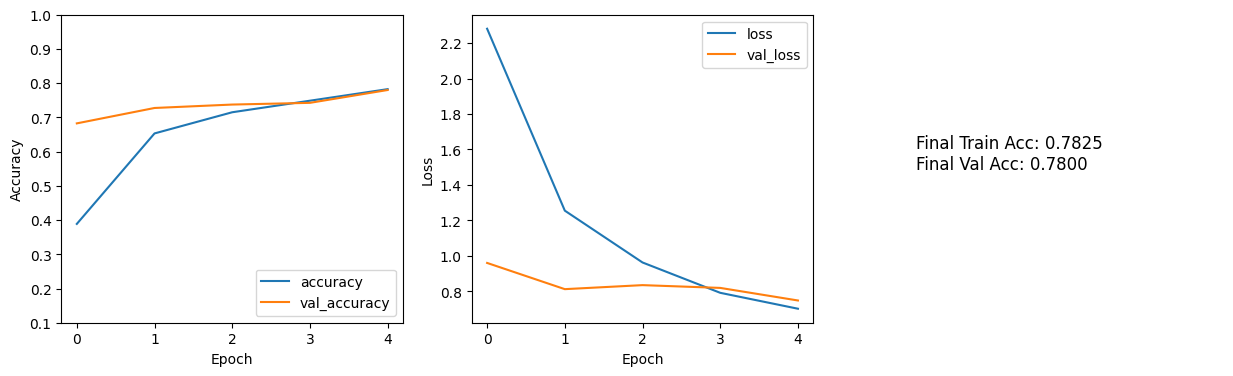

              precision    recall  f1-score   support

           0     0.6923    0.7895    0.7377        57
           1     0.9211    0.8537    0.8861        41
           2     0.8125    0.5098    0.6265        51
           3     0.6071    0.6939    0.6476        49
           4     0.5714    0.8000    0.6667        40
           5     0.6792    0.7500    0.7129        48
           6     0.8400    0.7778    0.8077        54
           7     0.9167    0.7021    0.7952        47
           8     0.8727    0.8421    0.8571        57
           9     0.8814    0.9286    0.9043        56

    accuracy                         0.7660       500
   macro avg     0.7794    0.7647    0.7642       500
weighted avg     0.7828    0.7660    0.7669       500

[[45  1  2  1  0  0  1  0  5  2]
 [ 2 35  0  0  0  0  0  0  0  4]
 [ 6  0 26  4  9  1  4  1  0  0]
 [ 0  0  1 34  3 10  0  0  1  0]
 [ 2  0  0  5 32  0  0  1  0  0]
 [ 0  0  0  5  5 36  1  1  0  0]
 [ 1  0  3  3  1  4 42  0  0  0]
 [ 2  0  0

In [34]:
plot_history(history_4)
eval_model(seqential_model_4, x_test_4, y_test_4)

# Exercise-5

In [35]:
import tensorflow_datasets as tfds
tf.random.set_seed(42)

def prep(x, y):
    x = tf.cast(x, tf.float32) / 255.0  
    return x, tf.cast(y, tf.int64)

train_ds = (tfds.load("svhn_cropped", split="train[:1600]", as_supervised=True)
            .map(prep).shuffle(1600, seed=42, reshuffle_each_iteration=False)
            .batch(32).prefetch(tf.data.AUTOTUNE))
val_ds   = (tfds.load("svhn_cropped", split="train[1600:2000]", as_supervised=True)
            .map(prep).batch(32).prefetch(tf.data.AUTOTUNE))

test_ds  = (tfds.load("svhn_cropped", split="test[:500]", as_supervised=True)
            .map(prep)
            .batch(32)
            .prefetch(tf.data.AUTOTUNE))

model_5 = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
    tf.keras.layers.MaxPooling2D(2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation="softmax"),
])

model_5.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

history_5 = model_5.fit(train_ds, epochs=15, validation_data=val_ds, verbose=2, batch_size=32)



Epoch 1/15
50/50 - 2s - 36ms/step - accuracy: 0.1850 - loss: 2.2702 - val_accuracy: 0.2100 - val_loss: 2.2292
Epoch 2/15
50/50 - 1s - 14ms/step - accuracy: 0.1912 - loss: 2.2555 - val_accuracy: 0.2100 - val_loss: 2.2234
Epoch 3/15
50/50 - 1s - 14ms/step - accuracy: 0.1931 - loss: 2.2483 - val_accuracy: 0.2100 - val_loss: 2.2248
Epoch 4/15
50/50 - 1s - 14ms/step - accuracy: 0.2256 - loss: 2.1650 - val_accuracy: 0.3050 - val_loss: 2.0055
Epoch 5/15
50/50 - 1s - 14ms/step - accuracy: 0.3600 - loss: 1.9116 - val_accuracy: 0.4750 - val_loss: 1.6328
Epoch 6/15
50/50 - 1s - 14ms/step - accuracy: 0.4762 - loss: 1.6209 - val_accuracy: 0.5025 - val_loss: 1.4067
Epoch 7/15
50/50 - 1s - 14ms/step - accuracy: 0.5550 - loss: 1.4441 - val_accuracy: 0.6100 - val_loss: 1.2738
Epoch 8/15
50/50 - 1s - 14ms/step - accuracy: 0.6156 - loss: 1.2509 - val_accuracy: 0.6425 - val_loss: 1.1895
Epoch 9/15
50/50 - 1s - 14ms/step - accuracy: 0.6631 - loss: 1.2310 - val_accuracy: 0.6700 - val_loss: 1.2075
Epoch 10/1

### Q5.1

The model ended up the a validation accuracy on 67% on the validation set and a 65% accuracy on the test set

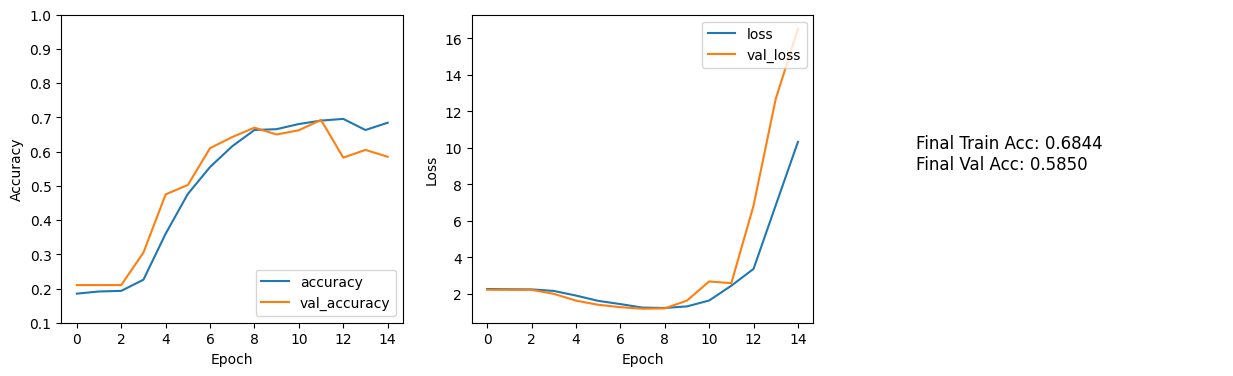

Test accuracy: 0.5580


In [36]:
plot_history(history_5)
test_loss, test_acc = model_5.evaluate(test_ds, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")


# Exercise-6

In [37]:
model_6 = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(32,32,3)),
        tf.keras.layers.Conv2D(32, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Conv2D(64, 3, activation="relu", padding="same"),
        tf.keras.layers.MaxPooling2D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.25),             
        tf.keras.layers.Dense(10, activation="softmax"),
    ])

model_6.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                 loss="sparse_categorical_crossentropy",
                 metrics=["accuracy"])


history_6 = model_6.fit(train_ds, epochs=15, verbose=2, validation_data=val_ds)

Epoch 1/15
50/50 - 1s - 21ms/step - accuracy: 0.1694 - loss: 2.2740 - val_accuracy: 0.2100 - val_loss: 2.2251
Epoch 2/15
50/50 - 0s - 8ms/step - accuracy: 0.1894 - loss: 2.2523 - val_accuracy: 0.2100 - val_loss: 2.2245
Epoch 3/15
50/50 - 0s - 8ms/step - accuracy: 0.1900 - loss: 2.2489 - val_accuracy: 0.2100 - val_loss: 2.2225
Epoch 4/15
50/50 - 0s - 8ms/step - accuracy: 0.1900 - loss: 2.2445 - val_accuracy: 0.2100 - val_loss: 2.2213
Epoch 5/15
50/50 - 0s - 8ms/step - accuracy: 0.1925 - loss: 2.2401 - val_accuracy: 0.2100 - val_loss: 2.2191
Epoch 6/15
50/50 - 0s - 8ms/step - accuracy: 0.1956 - loss: 2.2312 - val_accuracy: 0.2100 - val_loss: 2.2095
Epoch 7/15
50/50 - 0s - 8ms/step - accuracy: 0.1975 - loss: 2.2281 - val_accuracy: 0.2100 - val_loss: 2.1983
Epoch 8/15
50/50 - 0s - 8ms/step - accuracy: 0.2087 - loss: 2.1982 - val_accuracy: 0.2125 - val_loss: 2.1706
Epoch 9/15
50/50 - 0s - 8ms/step - accuracy: 0.2338 - loss: 2.1492 - val_accuracy: 0.2175 - val_loss: 2.1064
Epoch 10/15
50/50 

### Q6.1

This model ended up on a 53% accuracy on validation set and 51% accuracy on the test set. We see the model loss is still dropping at 15 epochs so a longer running model should get higher accuracy.

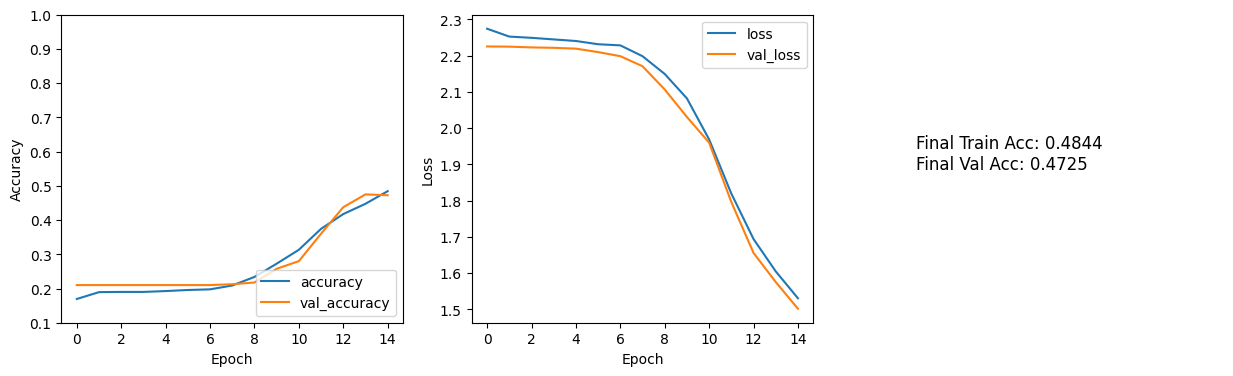

Test accuracy: 0.4460


In [38]:
plot_history(history_6)
test_loss, test_acc = model_6.evaluate(test_ds, verbose=0)
print(f"Test accuracy: {test_acc:.4f}")

### Q6.2 & Q6.3

When measuring accuracy with mc-dropout it ended up with 48% accuracy and the average epstimetic uncertainty ended up 0.002 which means there is little parameter uncertainty. This means that the model is condifently wrong. For the mc dropout the model seems to underfit, so adding dropout at inference probably increase bias and results in worse accuracy.

In [40]:
te = tfds.load("svhn_cropped", split="test[:500]", as_supervised=True, batch_size=-1)
x_test_np, y_test_np = tfds.as_numpy(te)
x_test_np = x_test_np.astype("float32") / 255.0

mc_passes = 20
probs = np.stack(
    [model_6(x_test_np, training=True).numpy() for i in range(mc_passes)],
    axis=0
) 

probs_mean = probs.mean(axis=0)    
y_pred = probs_mean.argmax(axis=1)
mc_acc = (y_pred == y_test_np).mean()

pred_var = probs.var(axis=0)    
      
epi_unc = pred_var.mean(axis=1).mean() 

print(f"MC acc: {mc_acc:.4f}")
print(f"Avg epistemic uncertainty: {epi_unc:.3f}")

MC acc: 0.3900
Avg epistemic uncertainty: 0.003
